<p> Sourced from DataCamp </p>

# Text processing
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 45%" src="https://assets.datacamp.com/production/project_38/img/Moby_Dick_p510_illustration.jpg"> </p>
<p>What are the most frequent words in Herman Melville's novel, Moby Dick, and how often do they occur?</p>
<p>In this notebook, we'll scrape the novel <em>Moby Dick</em> from the website <a href="https://www.gutenberg.org/">Project Gutenberg</a> (which contains a large corpus of books) using the Python package <code>requests</code>. Then we'll extract words from this web data using <code>BeautifulSoup</code>. Finally, we'll dive into analyzing the distribution of words using the Natural Language ToolKit (<code>nltk</code>) and <code>Counter</code>.</p>
<p>The <em>Data Science pipeline</em> we'll build in this notebook can be used to visualize the word frequency distributions of any novel that you can find on Project Gutenberg. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and includes a great deal of text.</p>
<p>Let's start by loading in the three main Python packages we are going to use.</p>

# IMPORTS

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
import pandas as pd
import re
from nltk.tokenize import RegexpTokenizer

#Import datavis libraries
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    !pip install seaborn --user
    import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Request Moby Dick
<p>To analyze Moby Dick, we need to get the contents of Moby Dick from <em>somewhere</em>. Luckily, the text is freely available online at Project Gutenberg as an HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm .</p>

In [2]:
# Getting the Moby Dick HTML 
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')
print(type(r))

<class 'requests.models.Response'>


In [3]:
# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

In [4]:
# Printing the first 2000 characters in html
r.text[:2000]

'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n<!DOCTYPE html\r\n   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\r\n  <head>\r\n    <title>\r\n      Moby Dick; Or the Whale, by Herman Melville\r\n    </title>\r\n    <style type="text/css" xml:space="preserve">\r\n\r\n    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }\r\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }\r\n    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}\r\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-se

# Get the text from the HTML

In [5]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Get hyperlinks from soup and check out first several
print(soup.findAll('a')[:8])

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>, <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
        </a>, <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>, <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>, <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>, <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>, <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>, <a href="#link2HCH0006"> CHAPTER 6. The Street. </a>]


In [6]:
# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
text[32000 : 34000]

't me\r\n      from deliberately stepping into the street, and methodically knocking\r\n      people’s hats off—then, I account it high time to get to sea as soon\r\n      as I can. This is my substitute for pistol and ball. With a philosophical\r\n      flourish Cato throws himself upon his sword; I quietly take to the ship.\r\n      There is nothing surprising in this. If they but knew it, almost all men\r\n      in their degree, some time or other, cherish very nearly the same feelings\r\n      towards the ocean with me.\r\n    \n\r\n      There now is your insular city of the Manhattoes, belted round by wharves\r\n      as Indian isles by coral reefs—commerce surrounds it with her surf.\r\n      Right and left, the streets take you waterward. Its extreme downtown is\r\n      the battery, where that noble mole is washed by waves, and cooled by\r\n      breezes, which a few hours previous were out of sight of land. Look at the\r\n      crowds of water-gazers there.\r\n    \n\r\n     

# Processing text

## Extract the words
<p>We now have the text of the novel! There is some unwanted stuff at the start and some unwanted stuff at the end. We could remove it, but this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is okay to leave it in.</p>
<p>Now that we have the text of interest, it's time to count how many times each word appears, and for this we'll use <code>nltk</code> – the Natural Language Toolkit. We'll start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.</p>

In [7]:
# Creating a tokenizer
tokenizer = RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

## Make the words lowercase
<p>OK! We're nearly there. Note that in the above 'Or' has a capital 'O' and that in other places it may not, but both 'Or' and 'or' should be counted as the same word. For this reason, we should build a list of all words in <em>Moby Dick</em> in which all capital letters have been made lower case.</p>

In [8]:
lowercase_words = []
for word in tokens:
    lowercase_words.append(word.lower())
lowercase_words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

In [9]:
nltk.download('stopwords')
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

sw[:8]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tamji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

## Remove stop words in Moby Dick
<p>We now want to create a new list with all <code>words</code> in Moby Dick, except those that are stop words (that is, those words listed in <code>sw</code>).</p>

In [10]:
print('word count before:\n', len(lowercase_words))

sw_removed_words = []
for word in lowercase_words:
    if word not in sw:
        sw_removed_words.append(word)
print('word count after:\n', len(sw_removed_words))
print('\n First few words: ', sw_removed_words[:8])
# sw_removed_words[:8]

word count before:
 222624
word count after:
 113214

 First few words:  ['moby', 'dick', 'whale', 'herman', 'melville', 'project', 'gutenberg', 'ebook']


# We have the answer
<p>Our original question was:</p>
<blockquote>
  <p>What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?</p>

## with loop

In [11]:
temp_dict = {}
for word in sw_removed_words:
    if word not in temp_dict.keys():
        temp_dict[word] = 1
    else:
        temp_dict[word] += 1
# print(temp_dict,'\n\n')

sorted_dict = {}
sorted_keys = sorted(temp_dict, key=temp_dict.get, reverse=True)

for w in sorted_keys:
    sorted_dict[w] = temp_dict[w]
# print(sorted_dict)

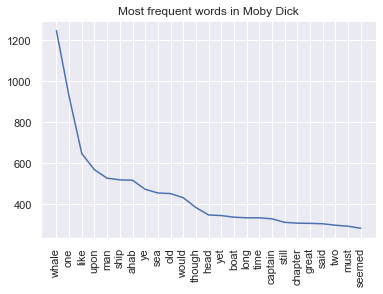

In [12]:
df = pd.DataFrame([sorted_dict]).T#.reset_index()
df[:25].plot(xticks=range(25), legend='')
plt.xticks(rotation=90)
plt.title('Most frequent words in Moby Dick')
plt.show()

## with counter

In [13]:
# Initialize a Counter object from our processed list of words
count = Counter(sw_removed_words)
# Store 10 most common words and their counts as top_ten
top_ten = count.most_common()[:10]
# Print the top ten words and their counts
top_ten

[('whale', 1246),
 ('one', 925),
 ('like', 647),
 ('upon', 568),
 ('man', 527),
 ('ship', 519),
 ('ahab', 517),
 ('ye', 473),
 ('sea', 455),
 ('old', 452)]

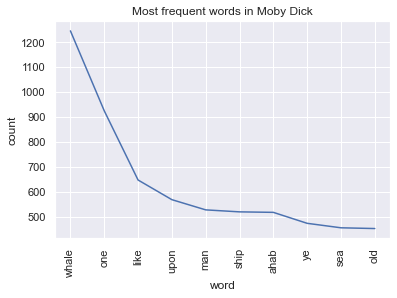

In [14]:
# creating pandas dataframe
top_ten_df = pd.DataFrame(top_ten,columns = ['word', 'count'])
# plot
sns.lineplot(x="word",y='count',data=top_ten_df)
plt.xticks(rotation=90)
plt.title('Most frequent words in Moby Dick')
plt.show()

## with nltk

<FreqDist with 17203 samples and 113214 outcomes>


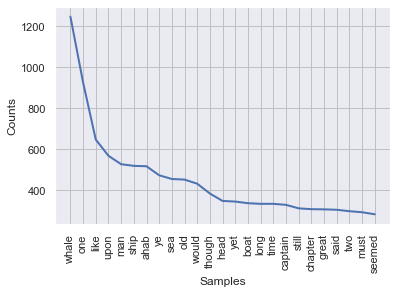

In [15]:
freqdist = nltk.FreqDist(sw_removed_words)
print(freqdist)
freqdist.plot(25);

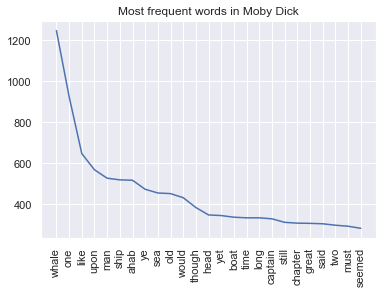

In [16]:
nltk_df = pd.DataFrame([freqdist]).T.sort_values(0, ascending=False)
nltk_df[:25].plot(xticks=range(25), legend= False, title='Most frequent words in Moby Dick')
plt.xticks(rotation = 90)
plt.show()

# The most common word
<p>Nice! Using our variable <code>top_ten</code>, we now have an answer to our original question.</p>
<p>The natural language processing skills we used in this notebook are also applicable to much of the data that Data Scientists encounter as the vast proportion of the world's data is unstructured data and includes a great deal of text. </p>
<p>So, what word turned out to (<em>not surprisingly</em>) be the most common word in Moby Dick?</p>

In [17]:
most_common_word = 'whale'
most_common_word.upper()

'WHALE'